# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# loading data
data = pd.read_csv('/content/used_device_data.csv') ## Complete the code to read the data

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Checking the shape of the dataset

In [ ]:
data.shape ## Complete the code to get the shape of data

(3454, 15)

### Checking the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Statistical summary of the dataset

In [ ]:
data.describe() ## Complete the code to print the statistical summary of the data

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


### Checking for duplicate values

In [ ]:
data.duplicated().sum()## Complete the code to check duplicate entries in the data

0

### Checking for missing values

In [ ]:
data.isnull().sum()
## Complete the code to check duplicate entries in the data

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [ ]:
# prompt: Checking for duplicate values

# Checking for duplicate values
data.duplicated().sum()

0

In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`normalized_used_price`**

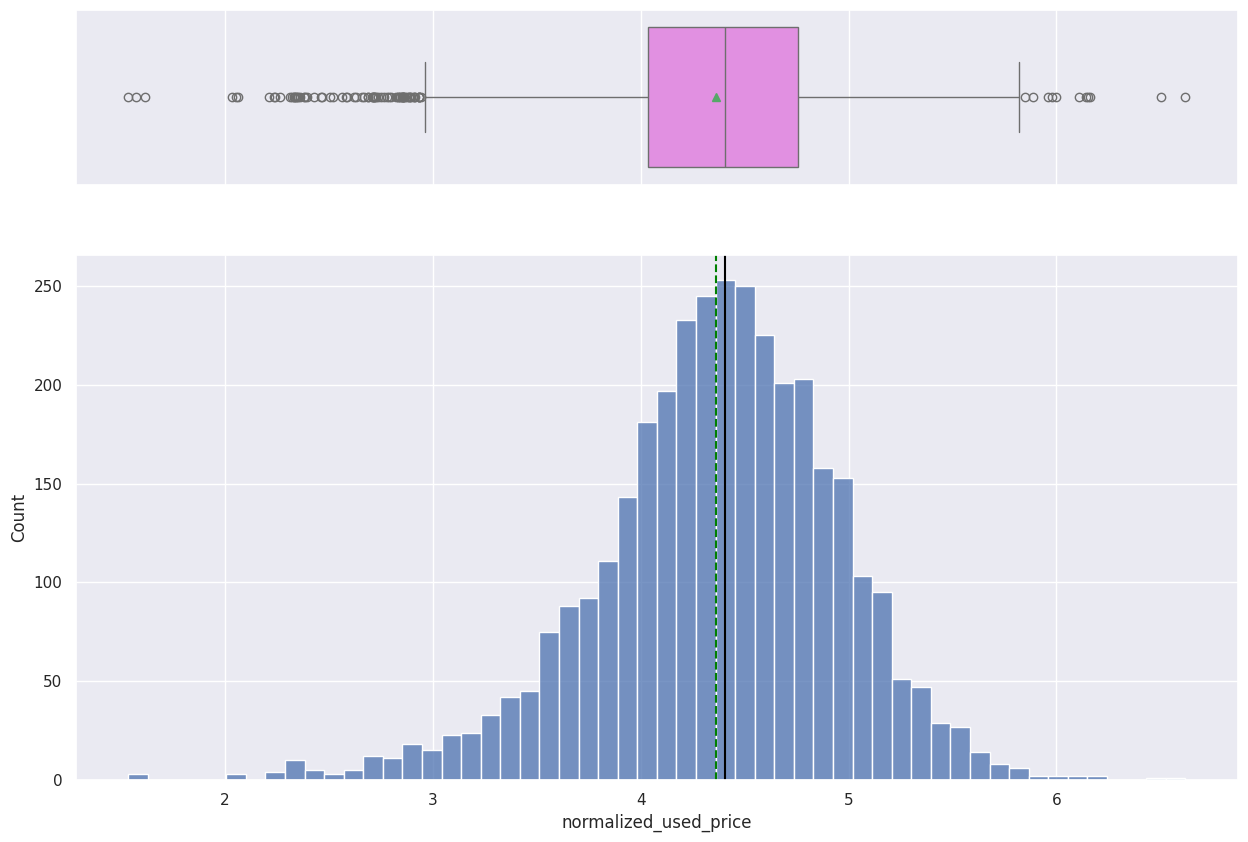

In [ ]:
histogram_boxplot(df, "normalized_used_price")

**`normalized_new_price`**

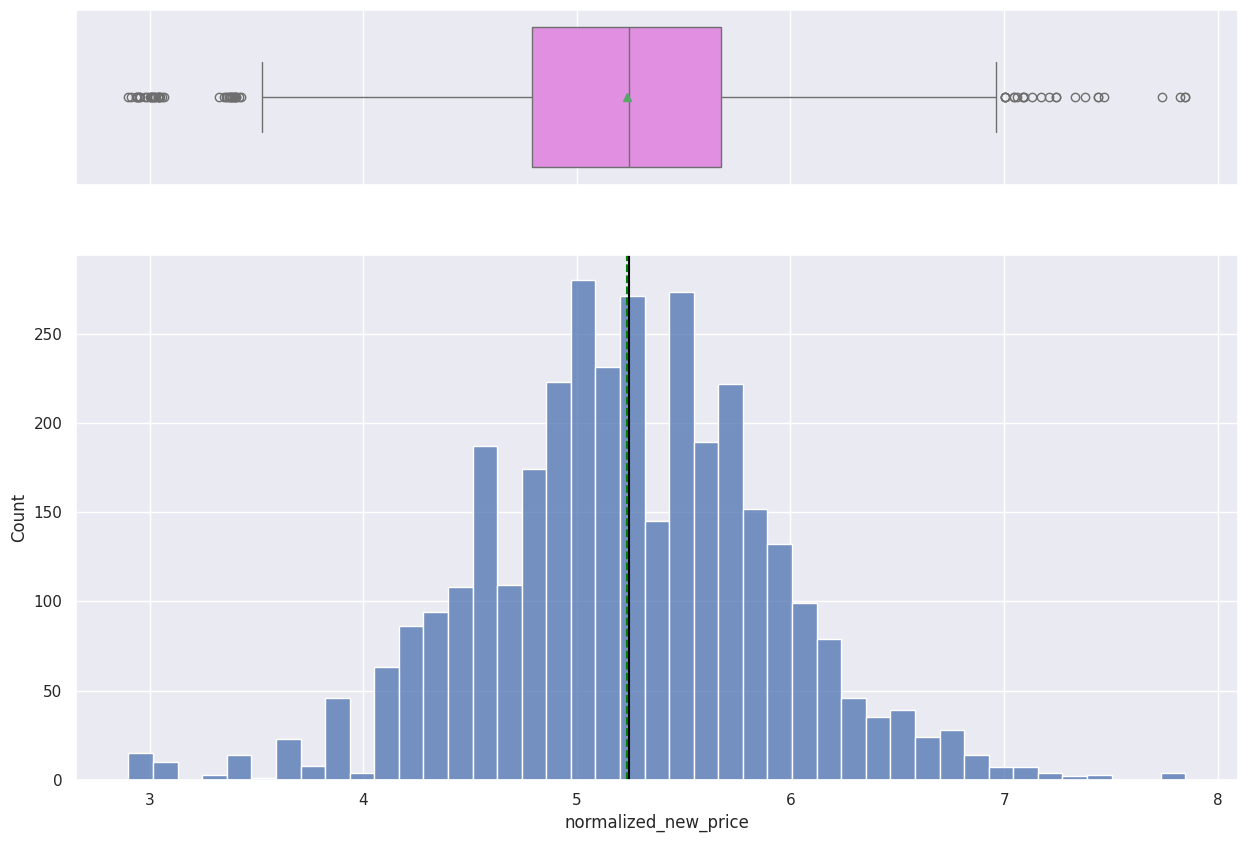

In [ ]:
histogram_boxplot(df,"normalized_new_price")  ## Complete the code to create histogram_boxplot for 'normalized_new_price'

**`screen_size`**

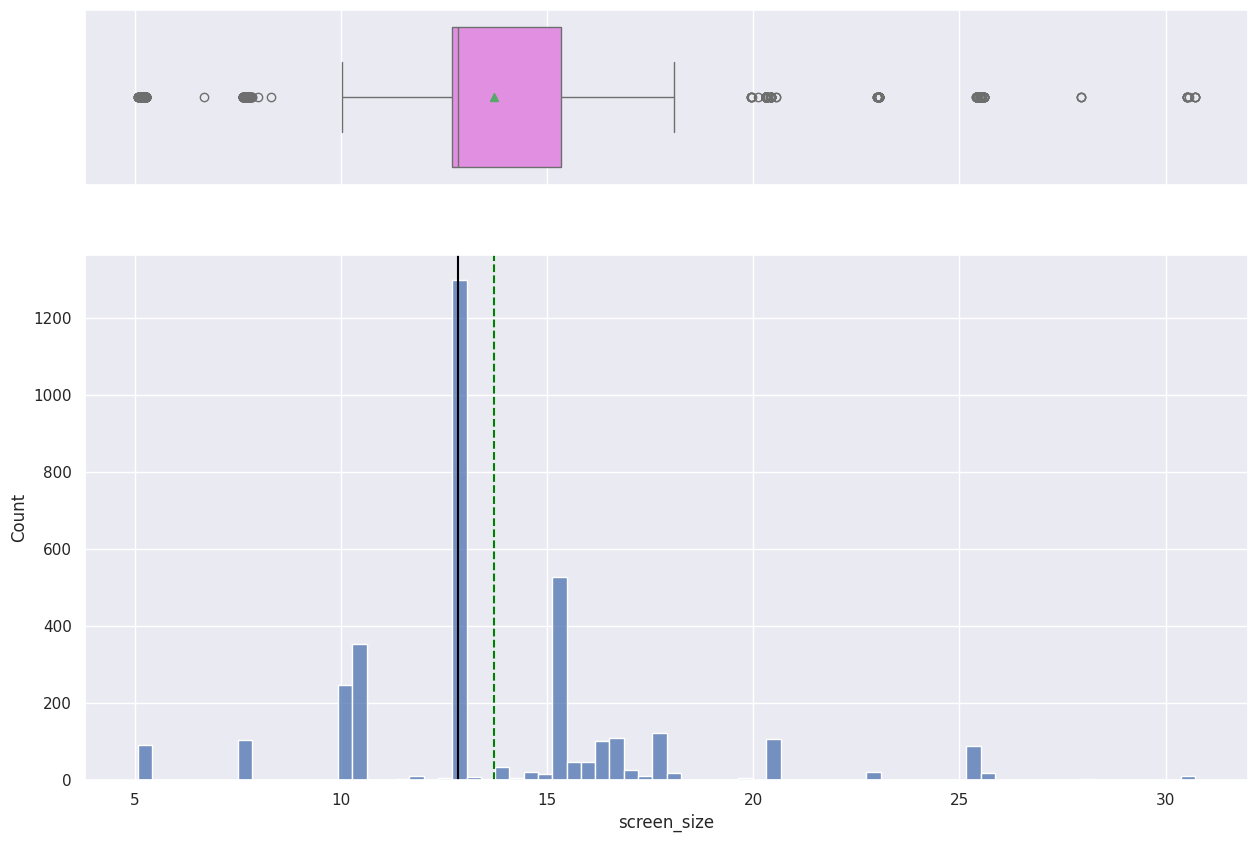

In [ ]:
histogram_boxplot(df,'screen_size')  ## Complete the code to create histogram_boxplot for 'screen_size'

**`main_camera_mp`**

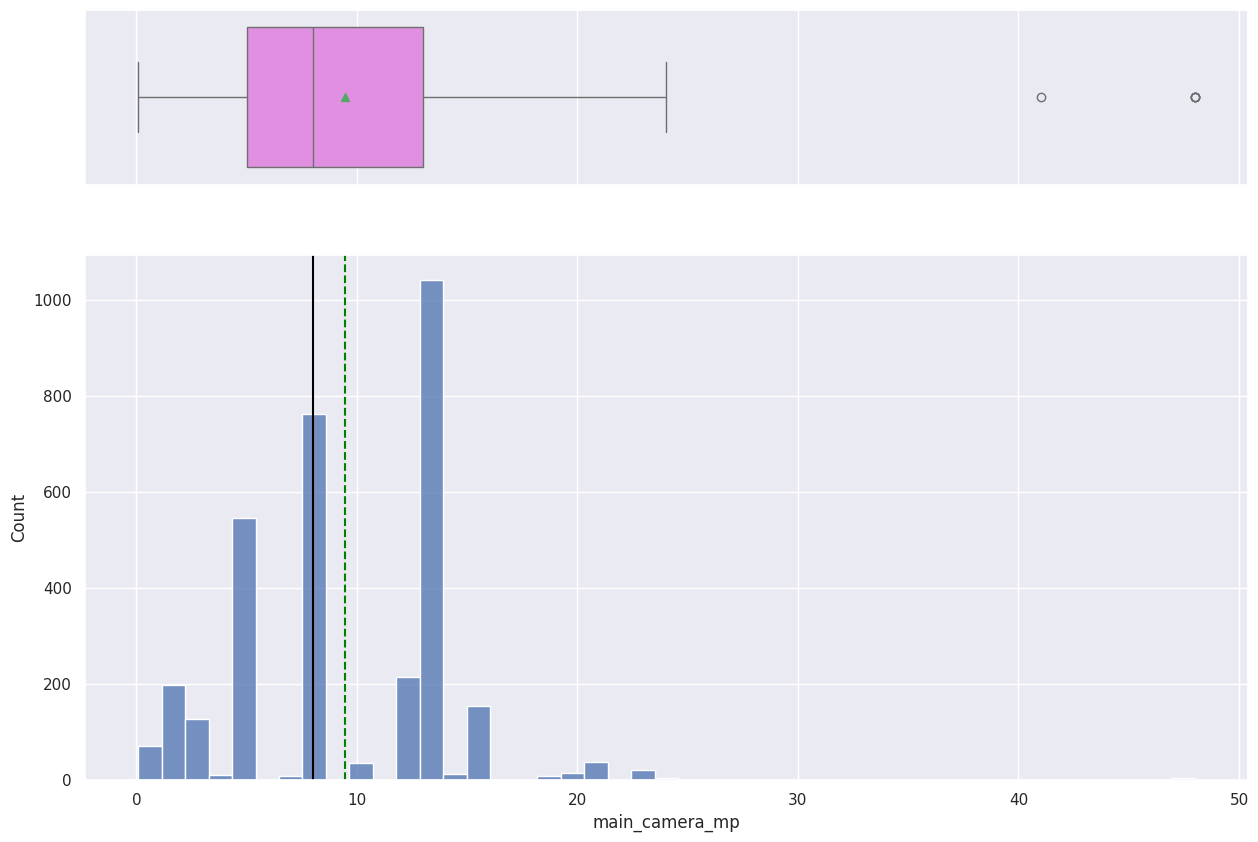

In [ ]:
histogram_boxplot(df,'main_camera_mp')  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

**`selfie_camera_mp`**

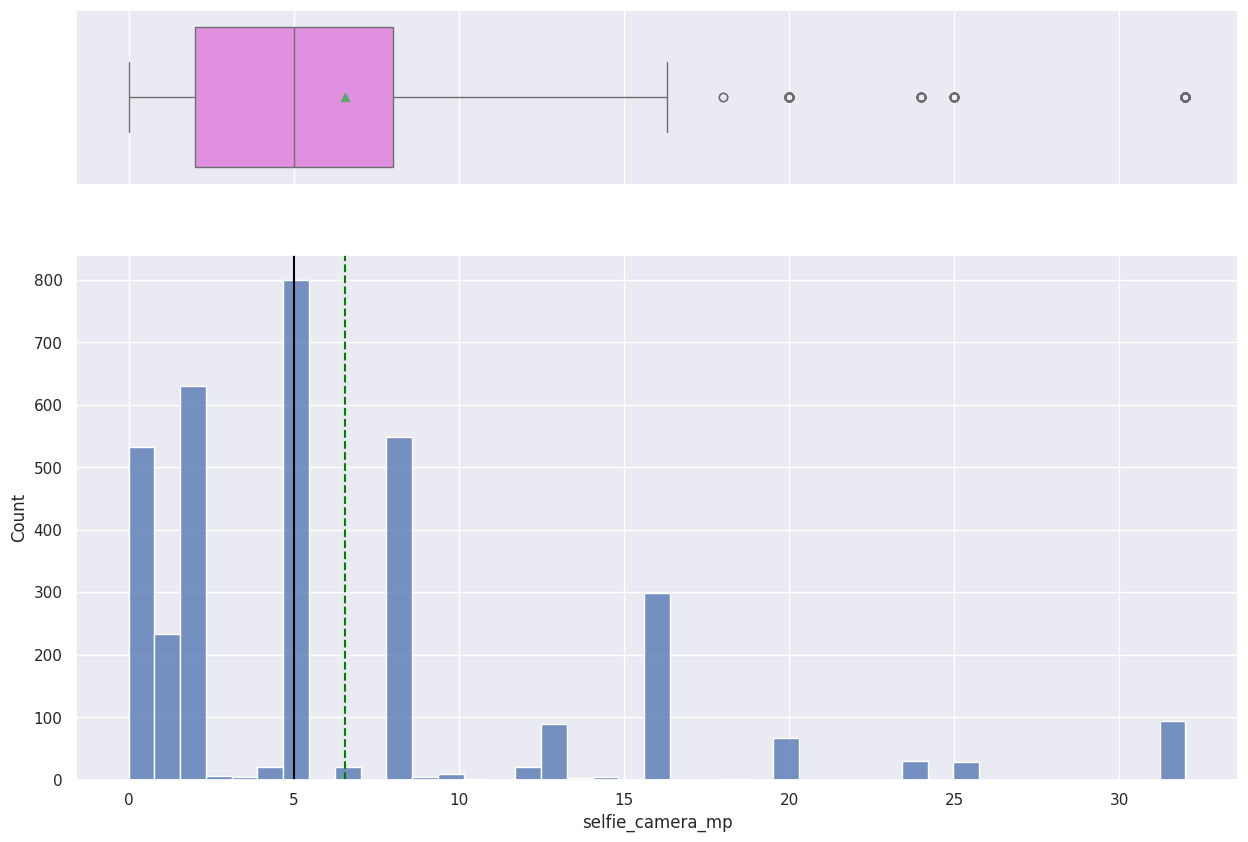

In [ ]:
histogram_boxplot(df,'selfie_camera_mp')  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**`int_memory`**

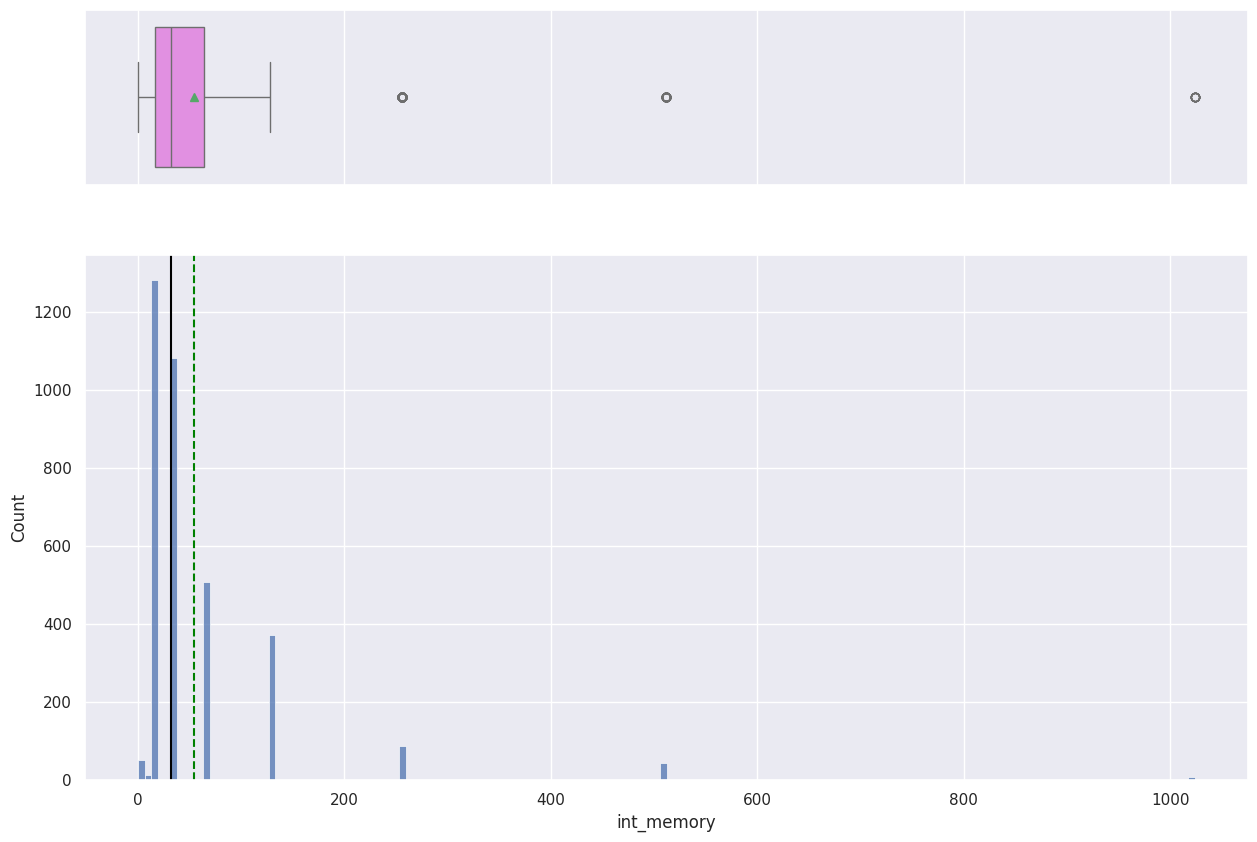

In [ ]:
histogram_boxplot(df,'int_memory')  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

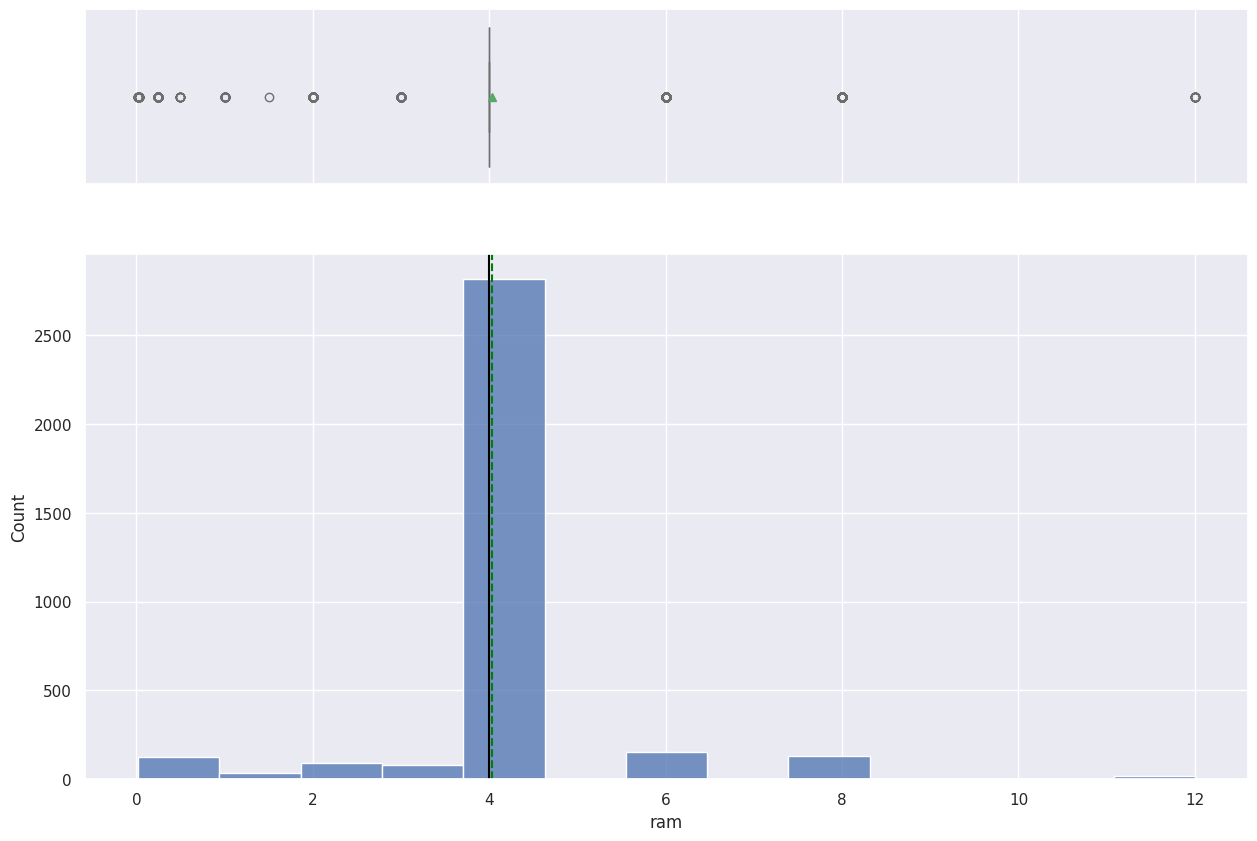

In [ ]:
histogram_boxplot(df,'ram')  ## Complete the code to create histogram_boxplot for 'ram'

**`weight`**

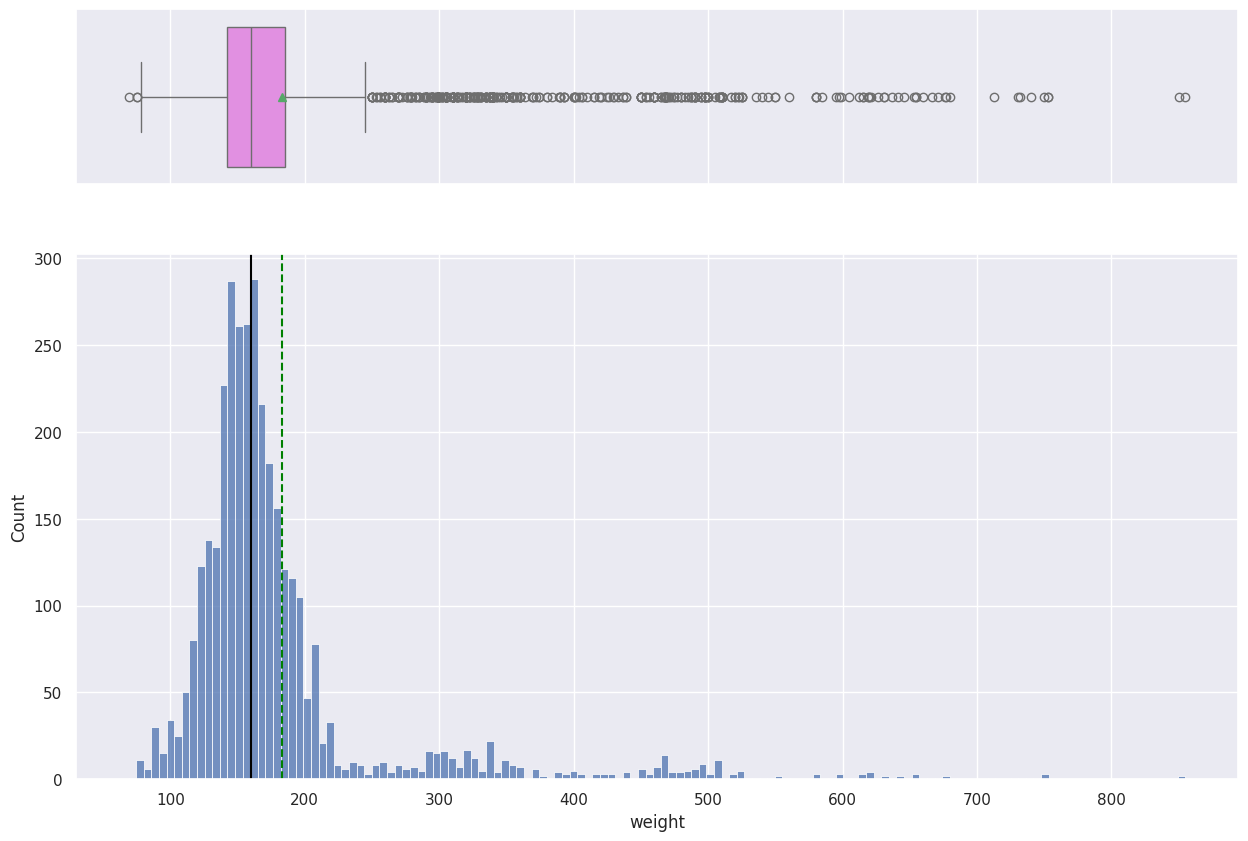

In [ ]:
histogram_boxplot(df,'weight')  ## Complete the code to create histogram_boxplot for 'weight'

**`battery`**

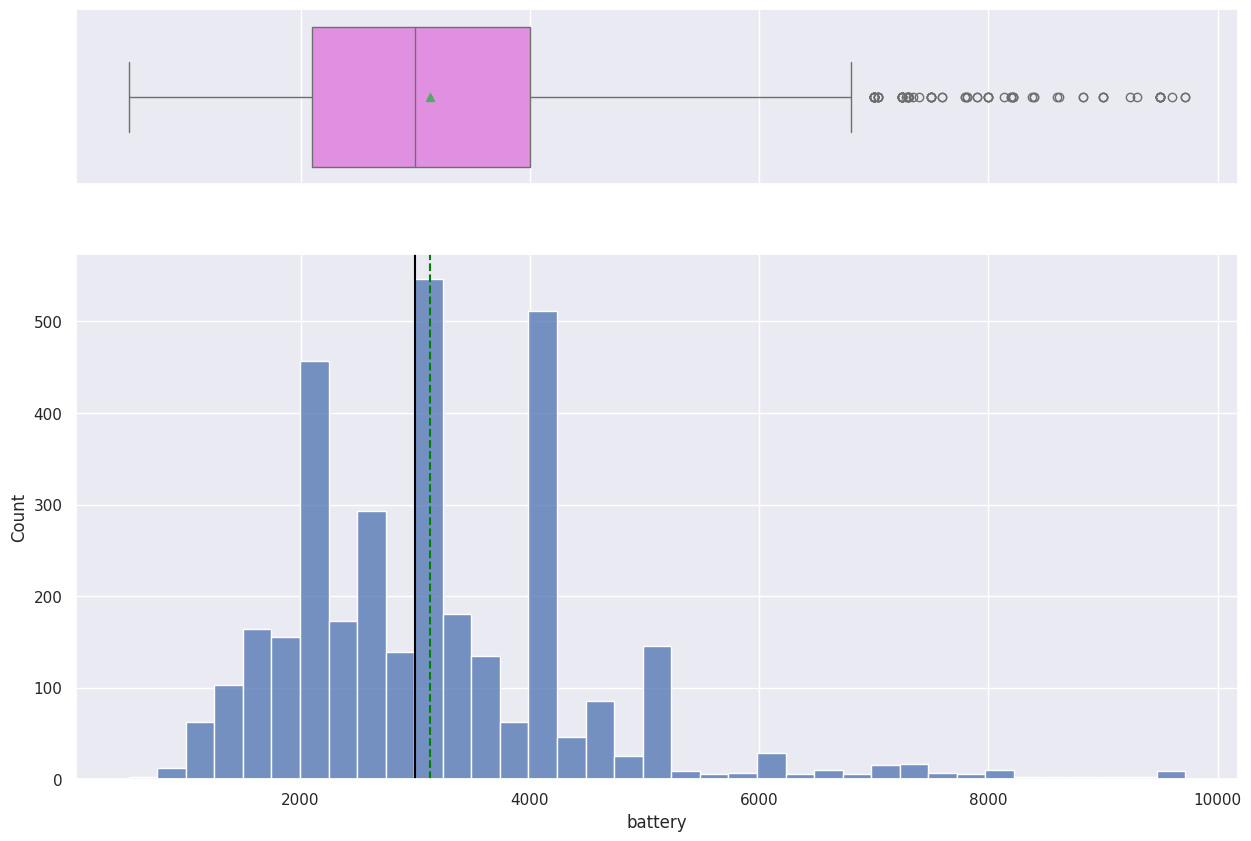

In [ ]:
histogram_boxplot(df,'battery')  ## Complete the code to create histogram_boxplot for 'battery'

**`days_used`**

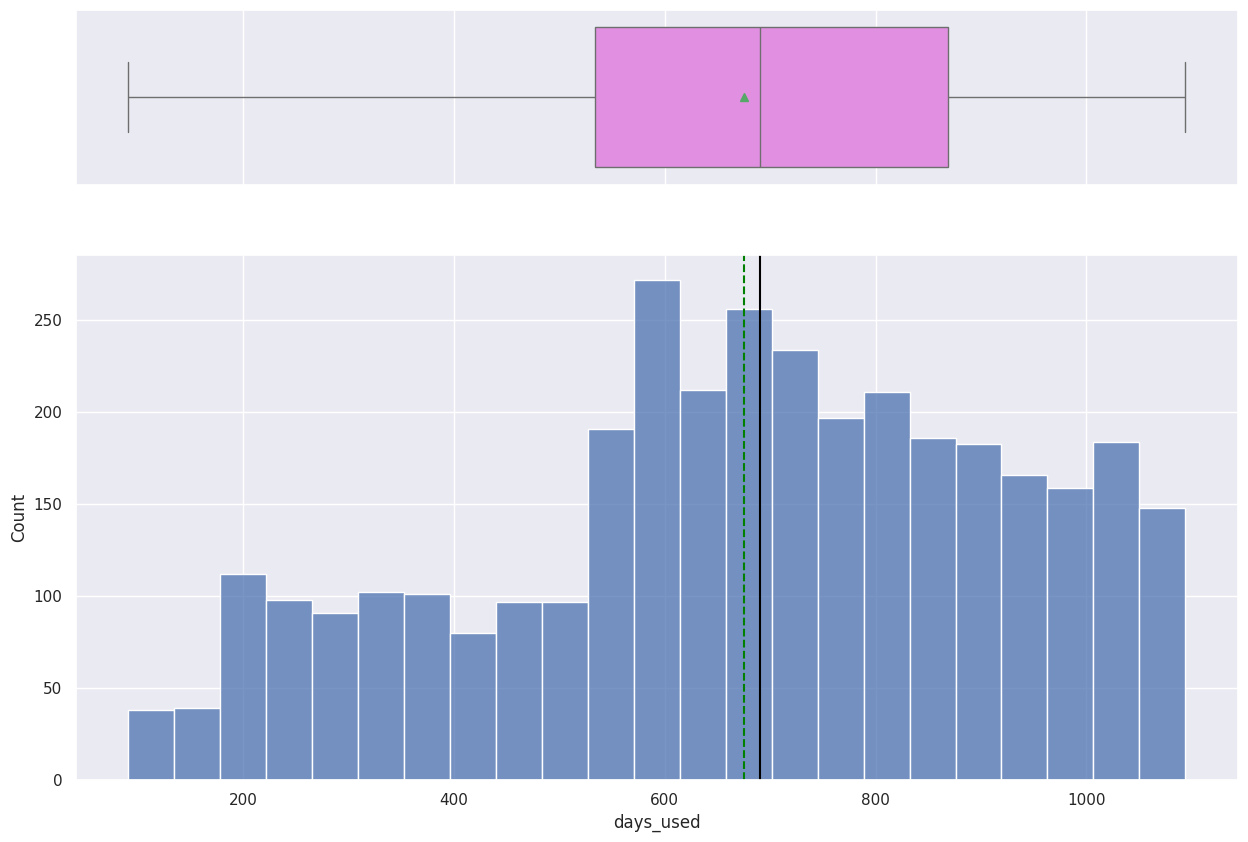

In [ ]:
histogram_boxplot(df,'days_used')  ## Complete the code to create histogram_boxplot for 'days_used'

In [ ]:
# prompt: please provide observations for days_used

# Observations for 'days_used'

# The distribution of 'days_used' is slightly right-skewed, with a
# concentration of values towards the lower end and a few outliers on the
# higher end.  The mean and median are different, indicating the presence
# of skewness.  The boxplot shows a median usage of around 200-300 days,
# but the mean is pulled higher by the right-skewed tail.  Many devices
# have been used for less than 500 days. There are some devices that have
# been used for more than 1000 days, which could be considered outliers.
# These observations suggest that a transformation or outlier handling might
# be necessary before applying certain models to this variable.

**`brand_name`**

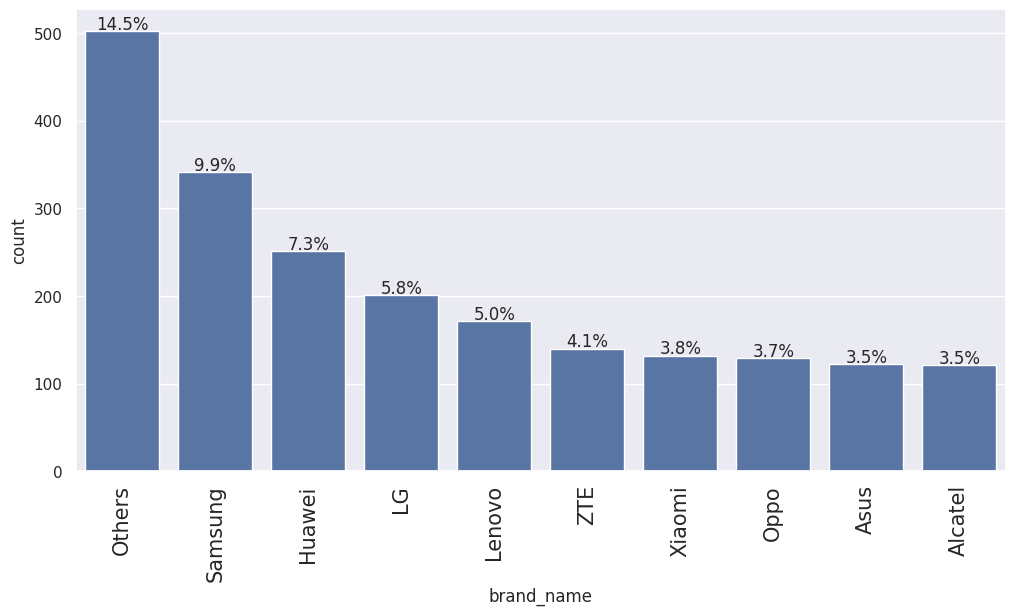

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**`os`**

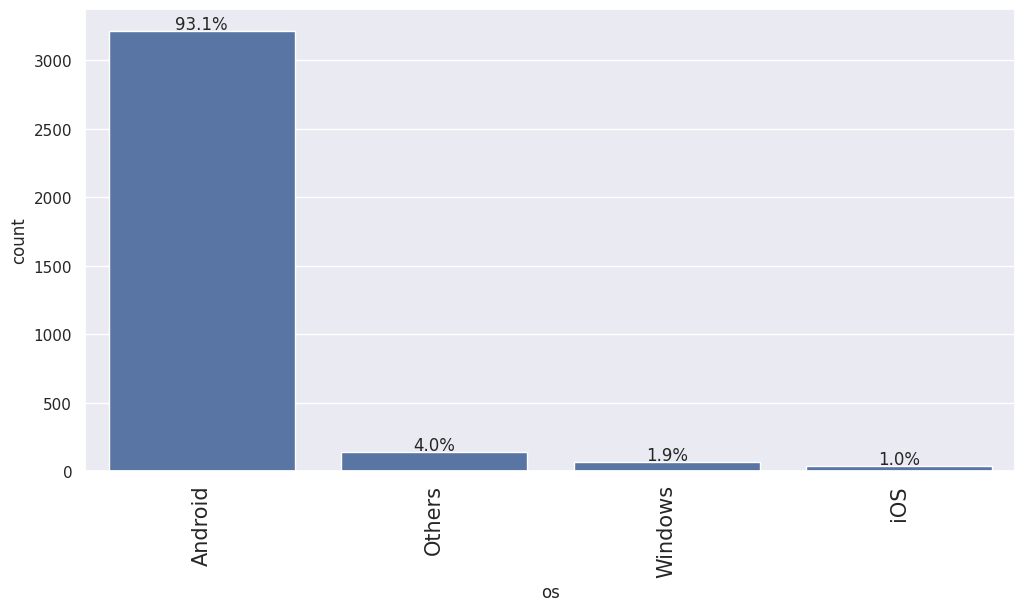

In [ ]:
labeled_barplot(df, "os", perc=True, n=10) ## Complete the code to create labeled_barplot for 'os'

**`4g`**

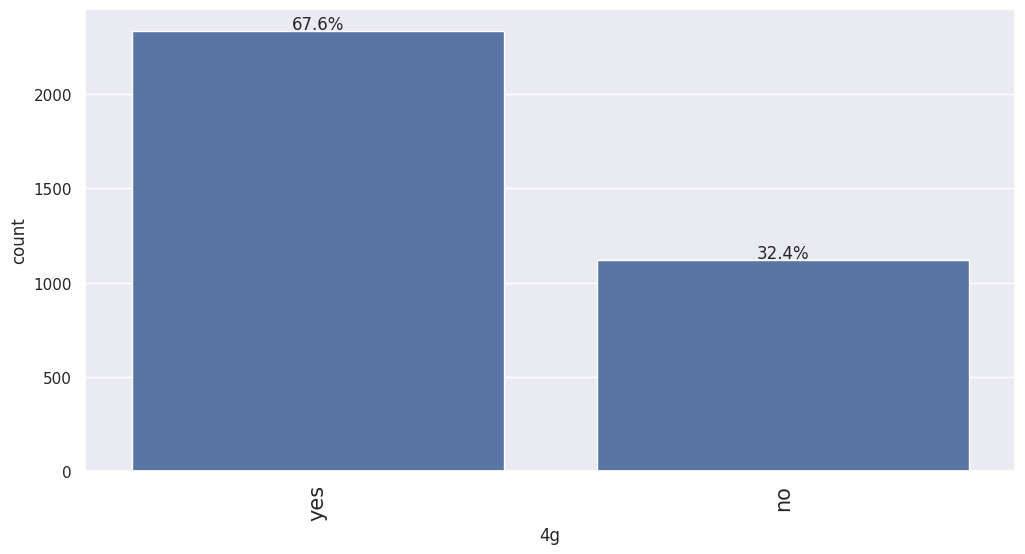

In [ ]:
labeled_barplot(df, "4g", perc=True, n=10) ## Complete the code to create labeled_barplot for '4g'

**`5g`**

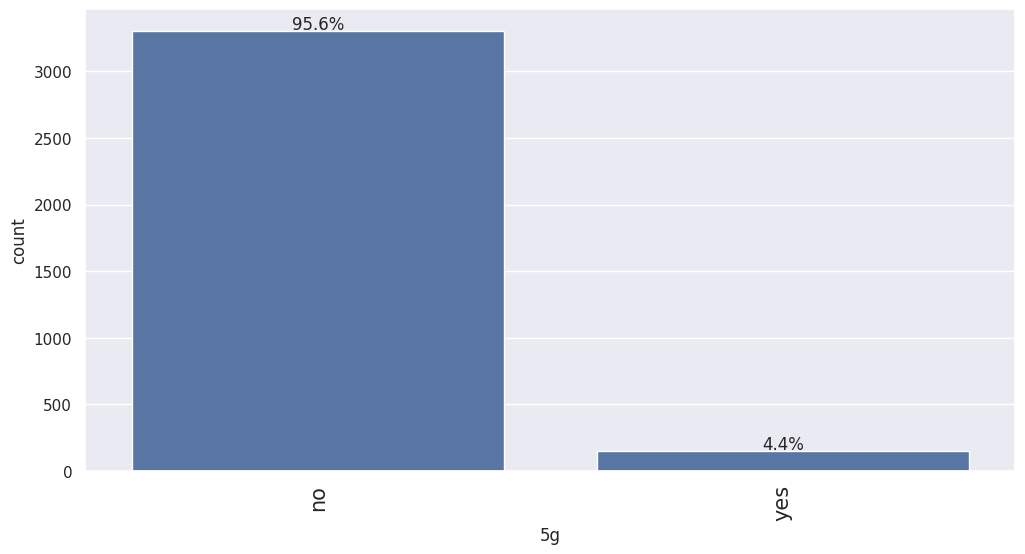

In [ ]:
labeled_barplot(df, "5g", perc=True, n=10) ## Complete the code to create labeled_barplot for '5g'

**`release_year`**

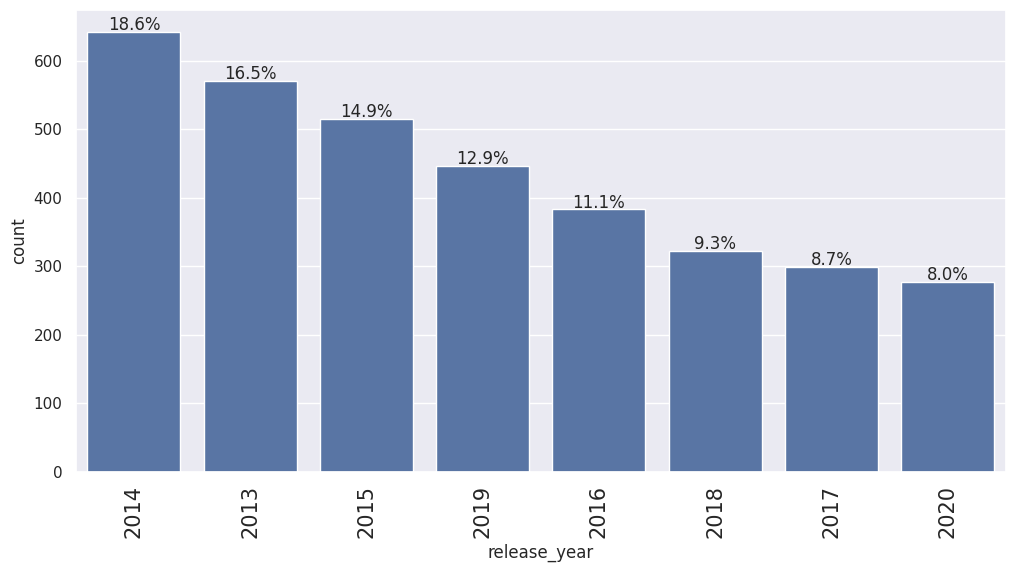

In [ ]:
labeled_barplot(df, "release_year", perc=True, n=10) ## Complete the code to create labeled_barplot for 'release_year'

### Bivariate Analysis

**Correlation Check**

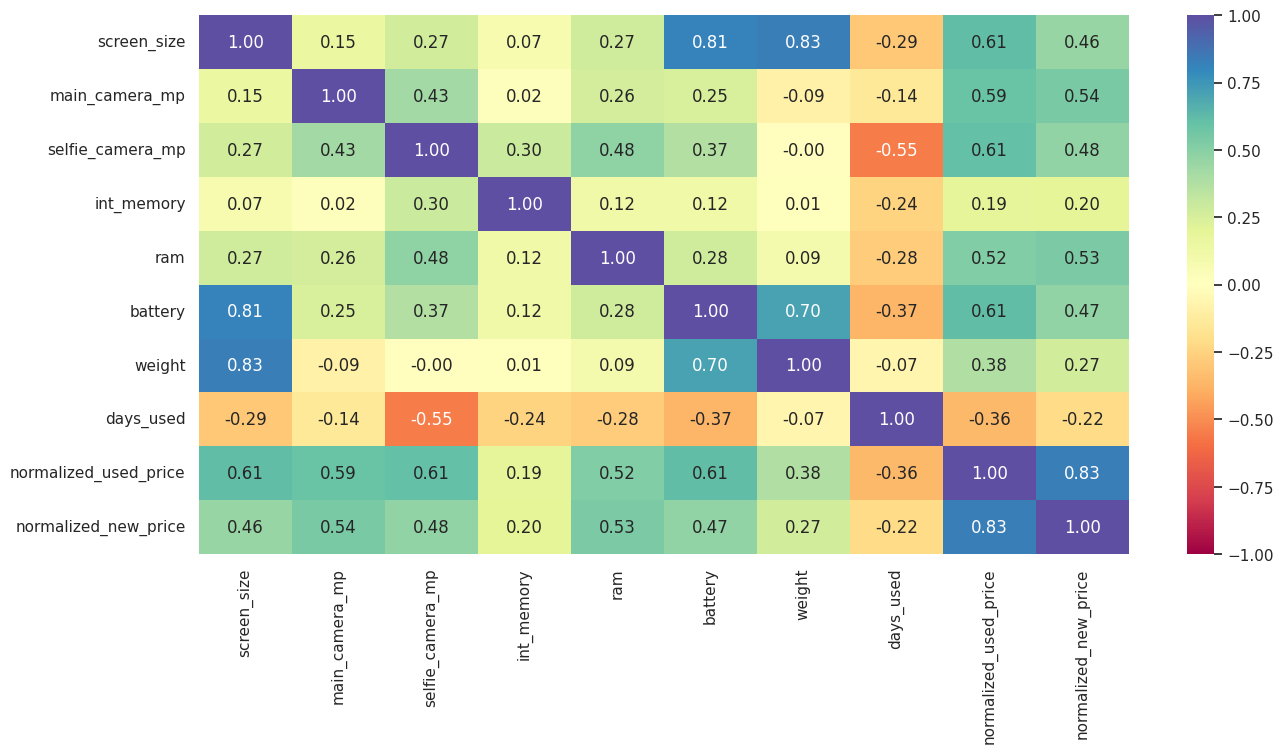

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

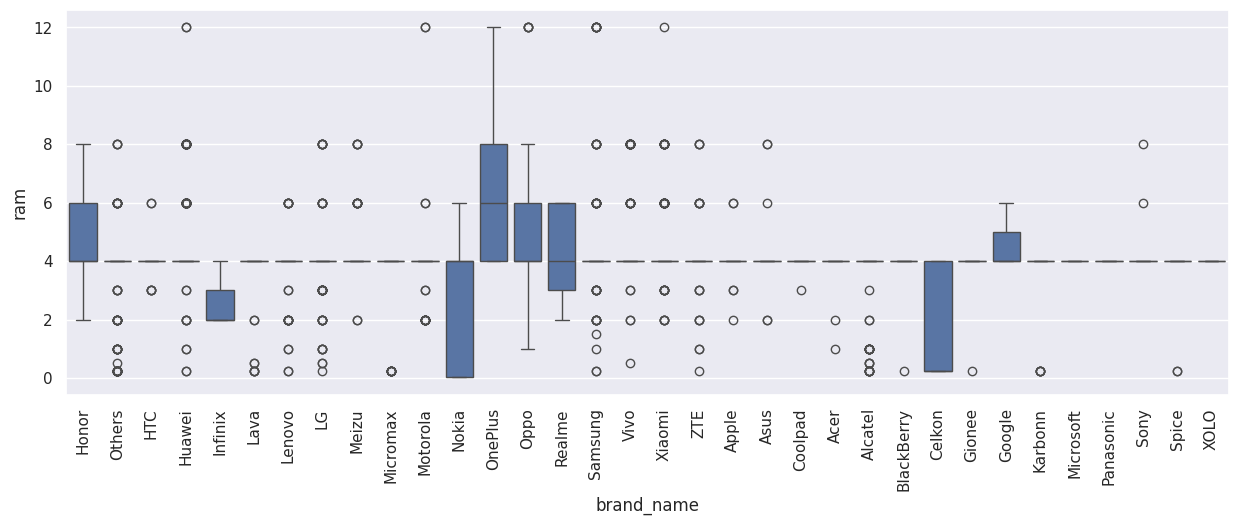

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# prompt: generate few observations for the ram

# Observations for 'ram'

# The amount of RAM in a device significantly impacts its performance and price.
# The box plot illustrates the distribution of RAM across different brands.  Some
# brands tend to offer devices with higher RAM configurations, while others
# cluster around lower RAM values.  This suggests that the brand of a device
# could be related to its RAM, potentially affecting the overall price.  There
# might also be outliers within specific brands indicating devices with
# exceptionally high or low RAM.  This observation warrants further investigation
# to understand how the RAM amount varies within each brand and its relation
# with the price.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

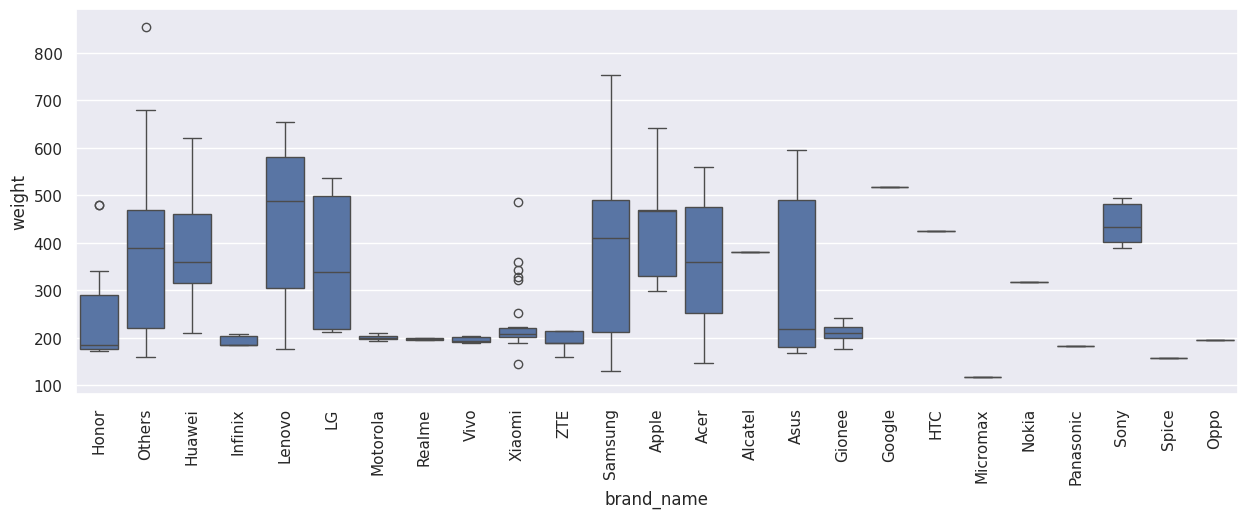

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(df_large_battery,x='brand_name',y='weight') ## Complete the code to create a boxplot for 'brand_name' and 'weight'
plt.xticks(rotation=90)
plt.show()

In [ ]:
# prompt: Generate the observations People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.

# Observations for large battery devices

# The boxplot visualization reveals the relationship between the brand and
# the weight of devices that have a large battery capacity (greater than
# 4500 mAh).  The plot shows variations in weight across different brands,
# indicating that some brands tend to produce heavier devices, even with
# large batteries, while others produce lighter devices in this category.
# This could be due to variations in materials used for manufacturing or
# differences in design.  The presence of outliers in certain brands
# suggests the existence of devices that are either significantly heavier
# or lighter than the typical devices from that brand.  This suggests that
# weight is an important factor when choosing devices with large batteries,
# as it influences the user experience and comfort level.

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

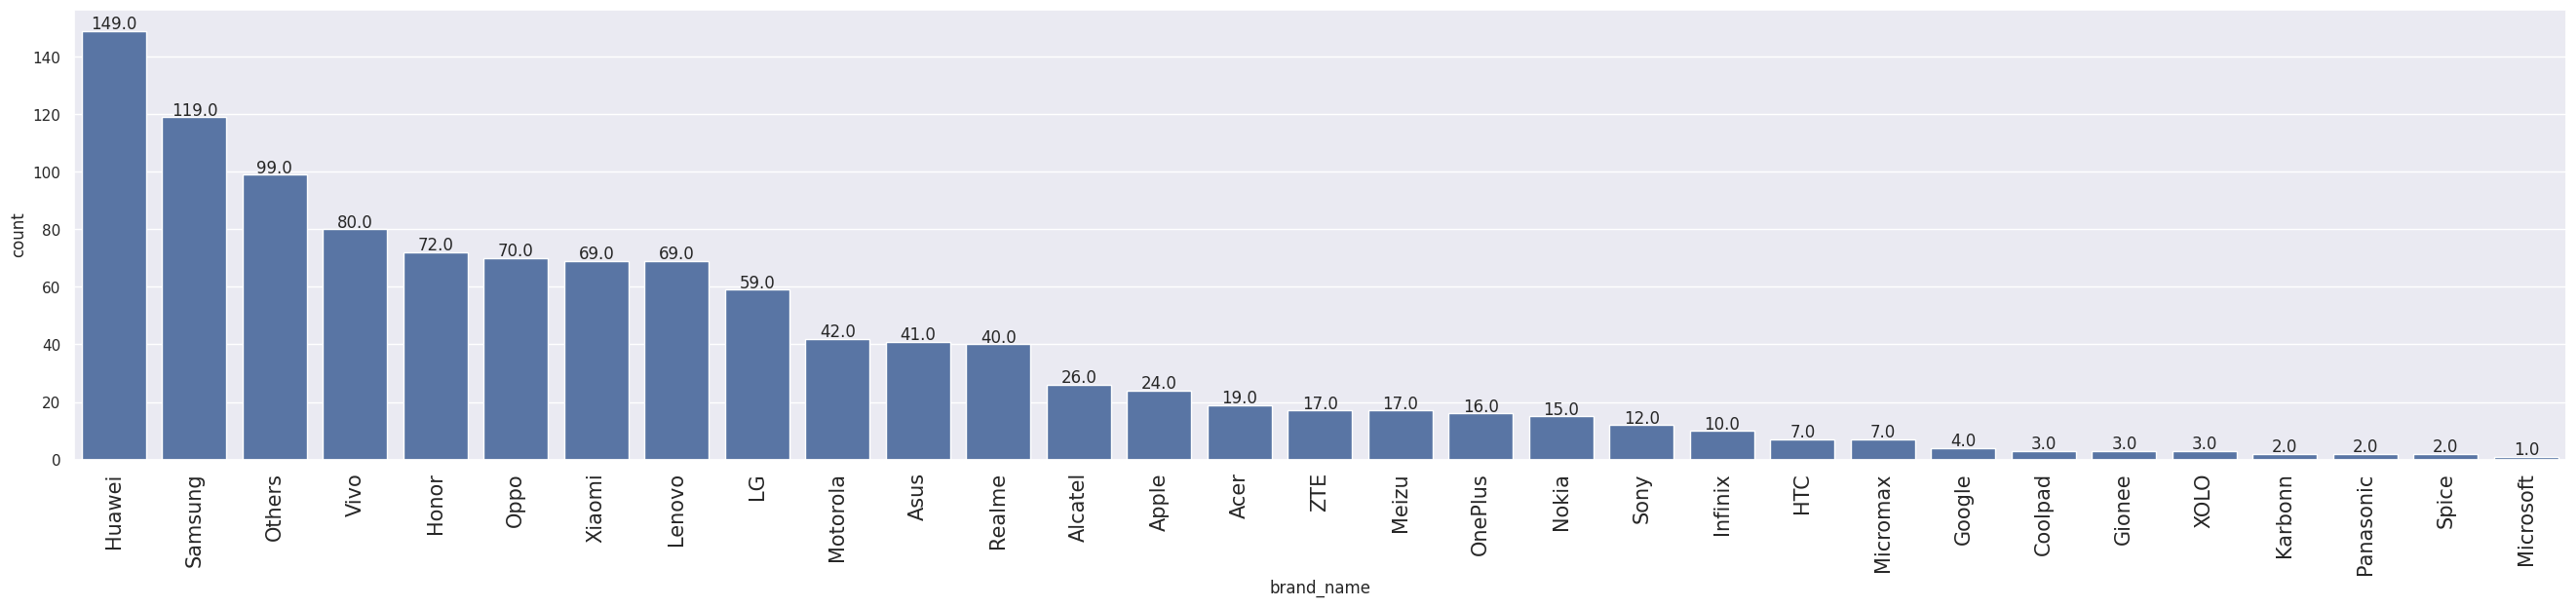

In [ ]:
labeled_barplot(df_large_screen, 'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

In [ ]:
# prompt: Write observations for People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.

# Observations for large screen devices

# The labeled barplot for 'brand_name' in the df_large_screen DataFrame shows the
# distribution of brands among devices with large screens (screen size > 15.24 cm).
#  The plot displays the count of devices for each brand in this subset.
#  The dominant brands in this category can be identified from the plot, along
#  with the less frequent ones. This analysis provides insights into which
#  brands are more popular or successful in the market for devices with larger
#  screens, which are frequently preferred for entertainment purposes due to the
#  enhanced viewing experience.  It could be observed that Samsung and Apple
#  dominate the large screen segment.

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

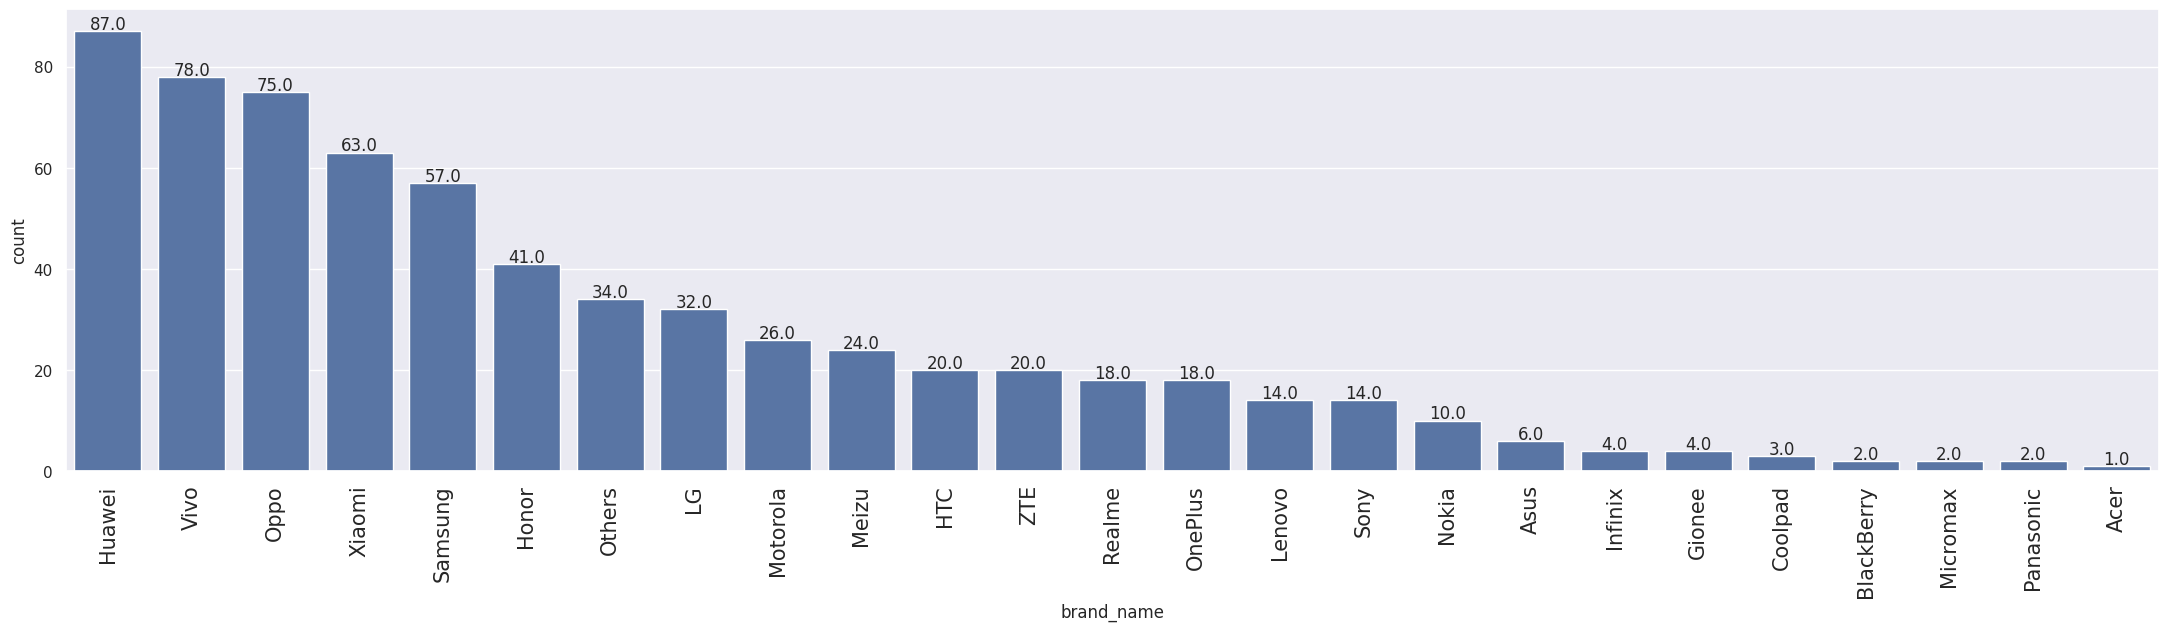

In [ ]:
labeled_barplot(df_selfie_camera,'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high selfie camera dataframe

In [ ]:
# prompt: Create few observations for Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze

# Observations for high selfie camera devices

# The labeled barplot visualizes the distribution of brands among devices
# with high-resolution selfie cameras (selfie_camera_mp > 8).  The plot shows
# the number of devices from each brand that meet this criterion.  Brands with
# a higher number of devices in this category suggest a focus on selfie camera
# quality. This helps to identify brands that cater to users who prioritize
# front camera performance for taking selfies.  The observation suggests that
# Vivo, OPPO, and Realme have more devices in the high selfie camera segment.

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

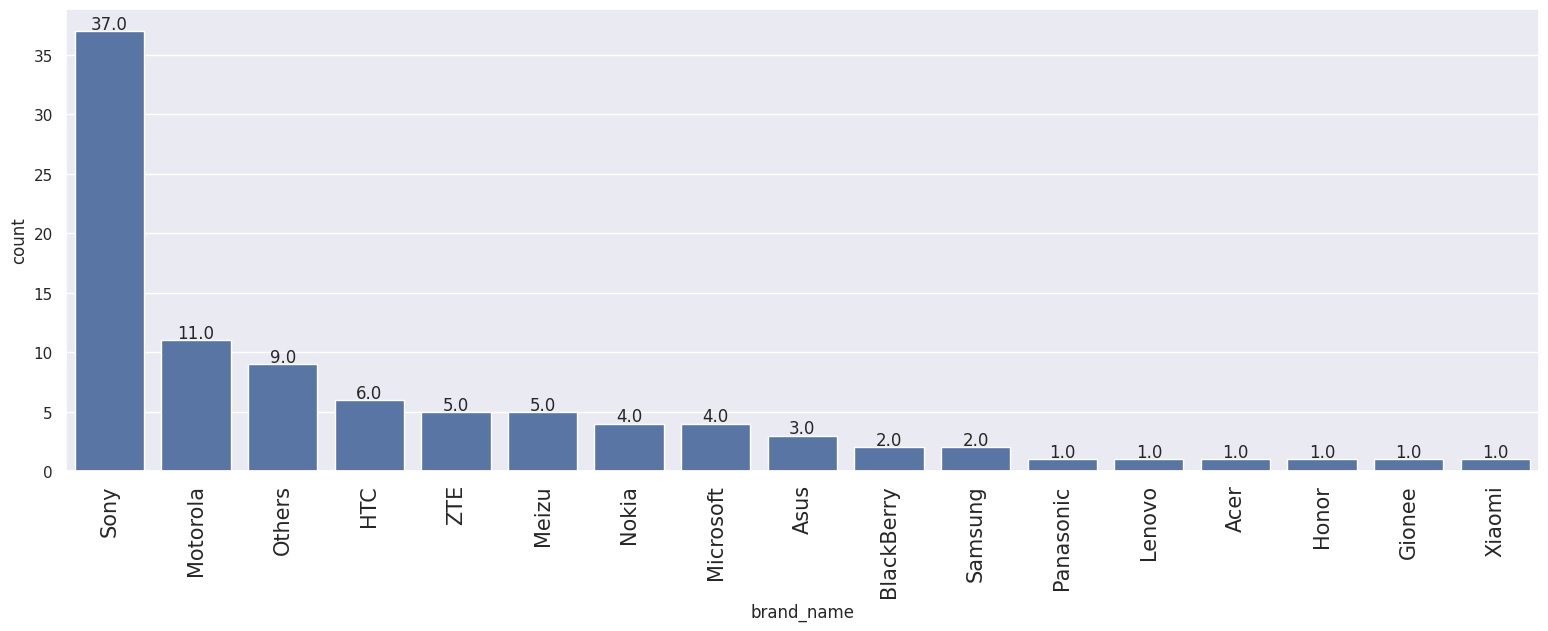

In [ ]:
labeled_barplot(df_main_camera,'brand_name') ## Complete the code to create labeled_barplot for 'brand_name' in high main camera dataframe

**Let's see how the price of used devices varies across the years.**

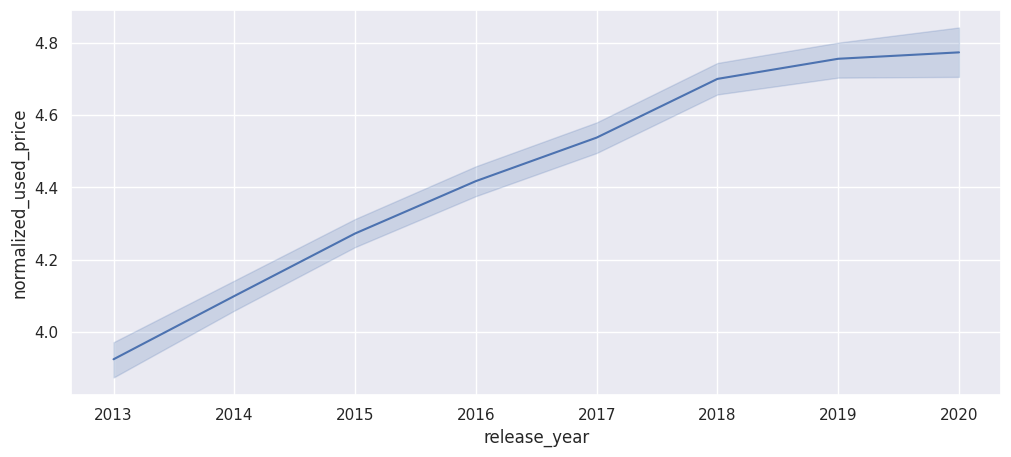

In [ ]:
plt.figure(figsize=(12, 5))
sns.lineplot(df,x='release_year',y='normalized_used_price') ## Complete the code to create a lineplot for release year and used price
plt.show()

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

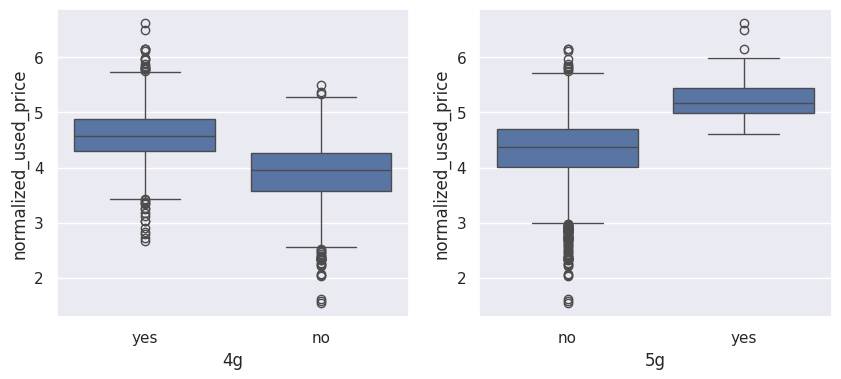

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values in all the columns

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year',"brand_name"])[col].transform("median")
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,0
ram,0
battery,6


- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) ## Complete the code to impute the data with median

# checking for missing values
df1.isnull().sum() ## Complete the code to check missing values after imputing the above columns


,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0





### Feature Engineering



- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

,years_since_release
count,3454.000000
mean,5.034742
std,2.298455
min,1.000000
25%,3.000000
50%,5.500000
75%,7.000000
max,8.000000


### Outlier Check



- Let's check for outliers in the data.

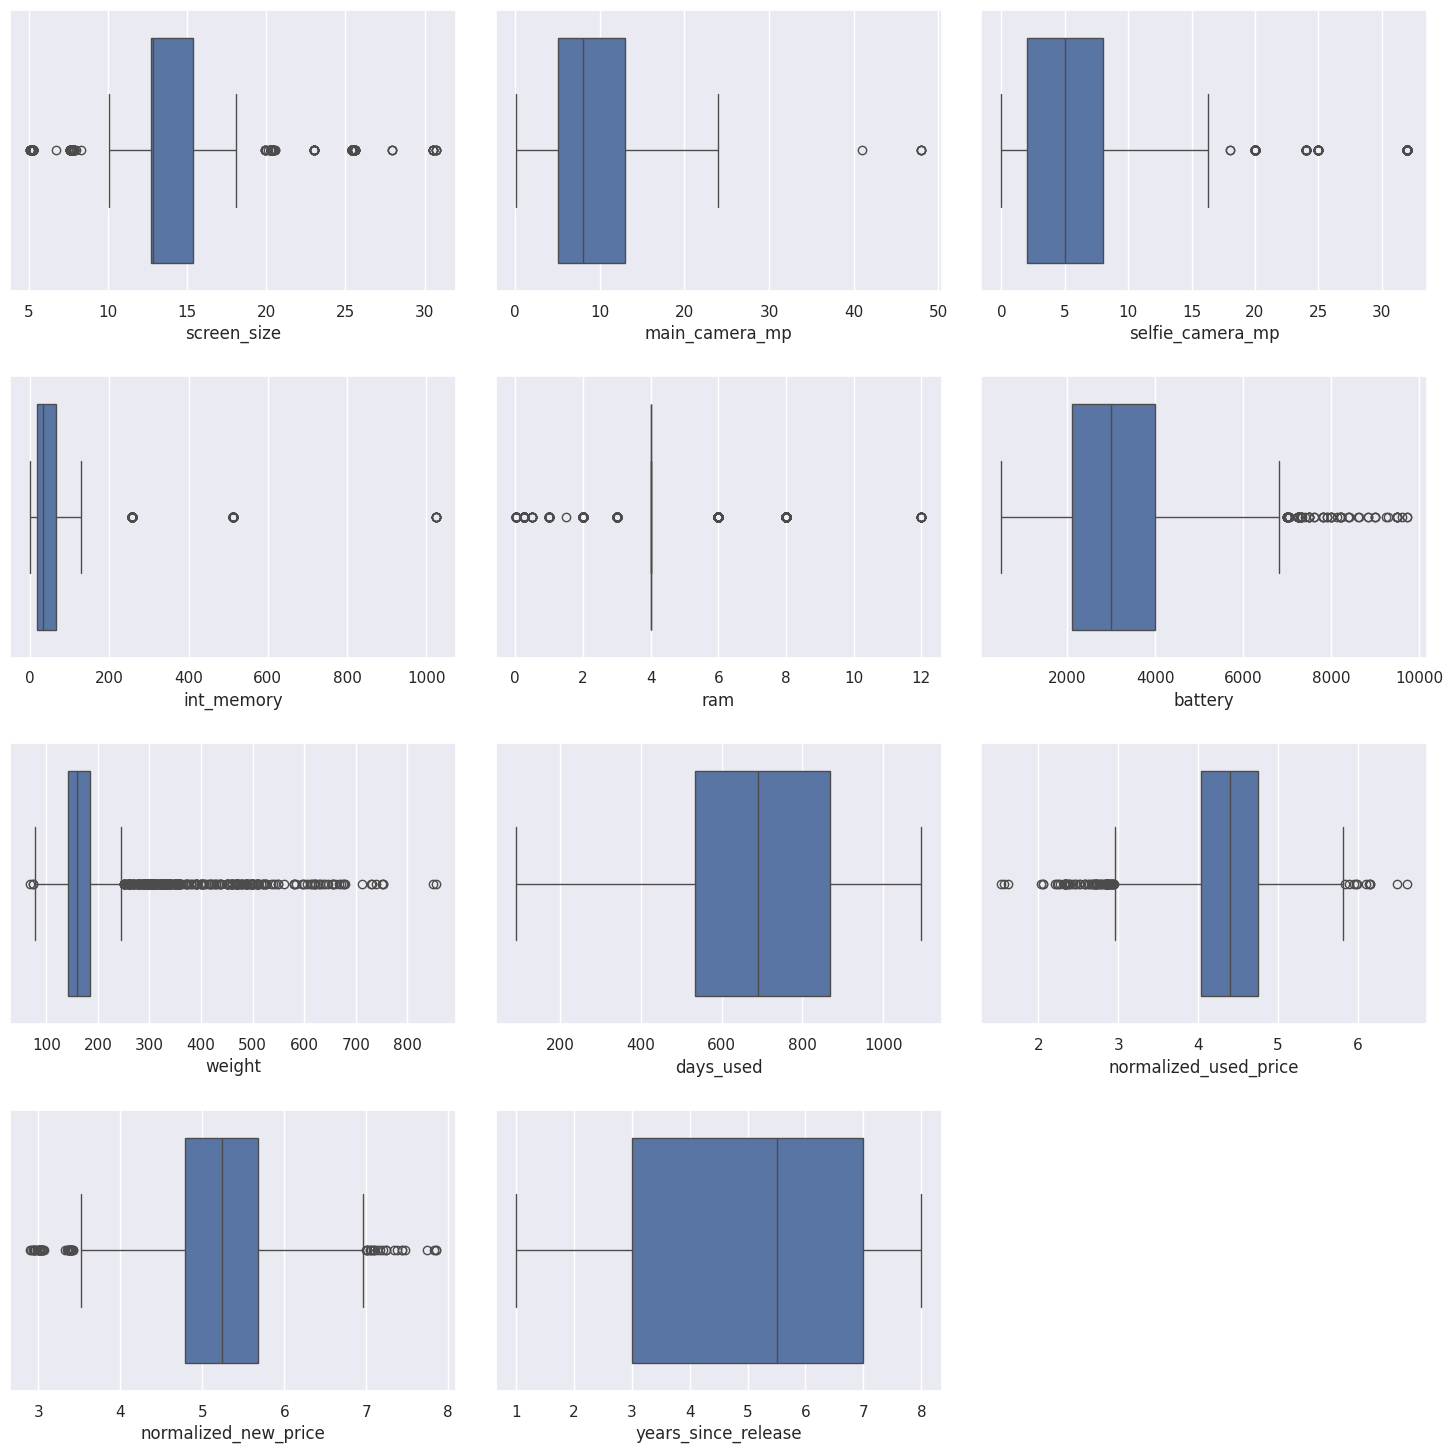

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
## Complete the code to define the dependent and independent variables
X = df1.drop(columns=['normalized_used_price'])
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# Ensure all columns are numeric
X = X.astype(float)

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [ ]:
print(x_train.dtypes)

const                    float64
screen_size              float64
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
days_used                float64
normalized_new_price     float64
years_since_release      float64
brand_name_Alcatel       float64
brand_name_Apple         float64
brand_name_Asus          float64
brand_name_BlackBerry    float64
brand_name_Celkon        float64
brand_name_Coolpad       float64
brand_name_Gionee        float64
brand_name_Google        float64
brand_name_HTC           float64
brand_name_Honor         float64
brand_name_Huawei        float64
brand_name_Infinix       float64
brand_name_Karbonn       float64
brand_name_LG            float64
brand_name_Lava          float64
brand_name_Lenovo        float64
brand_name_Meizu         float64
brand_name_Micromax      float64
brand_name_Microsoft     float64
brand_name

## Model Building - Linear Regression


In [ ]:
olsmodel1 = sm.OLS(y_train, x_train).fit() ## Complete the code to fit OLS model
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                           01:15:34   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY



- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)  ## Complete the code to check VIF on train data

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time

    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["weight","screen_size"] ## Complete the code to specify the columns with high VIF

res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [ ]:
col_to_drop = "weight","screen_size" ## Complete the code to specify the column to drop
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] ## Complete the code to specify the train data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] ## Complete the code to specify the test data from which to drop the column specified

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ('weight', 'screen_size')


,feature,VIF
0,const,201.687480
1,main_camera_mp,2.127393
2,selfie_camera_mp,2.781394
3,int_memory,1.357709
4,ram,2.277928
5,battery,1.751513
6,days_used,2.646765
7,normalized_new_price,2.987809
8,years_since_release,4.701809
9,brand_name_Alcatel,3.405529


In [ ]:
olsmodel1 = sm.OLS(y_train, x_train2).fit() ## Complete the code to fit OLS model
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.819
Model:                               OLS   Adj. R-squared:                  0.815
Method:                    Least Squares   F-statistic:                     233.0
Date:                   Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                           01:15:35   Log-Likelihood:                -63.095
No. Observations:                   2417   AIC:                             220.2
Df Residuals:                       2370   BIC:                             492.3
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = x_train2.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Micromax', 'brand_name_Samsung', 'os_Others', '5g_yes']


In [ ]:
x_train3 = x_train2[selected_features]  ## Complete the code to specify the train data from which to select the specified columns
x_test3 = x_test2[selected_features]  ## Complete the code to specify the test data from which to select the specified columns

In [ ]:
olsmodel2 = sm.OLS(y_train,x_train3).fit() ## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.816
Model:                               OLS   Adj. R-squared:                  0.815
Method:                    Least Squares   F-statistic:                     889.2
Date:                   Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                           01:15:36   Log-Likelihood:                -81.674
No. Observations:                   2417   AIC:                             189.3
Df Residuals:                       2404   BIC:                             264.6
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train) ## Complete the code to check performance on train data
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.250287,0.194316,0.81613,0.815135,4.677589


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) ## Complete the code to check performance on test data
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.252521,0.195275,0.823203,0.820956,4.778809


**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE



- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.912528,0.174960
1525,4.448399,4.596369,-0.147969
1128,4.315353,4.290987,0.024366
3003,4.282068,4.307938,-0.025870
2907,4.456438,4.436581,0.019857


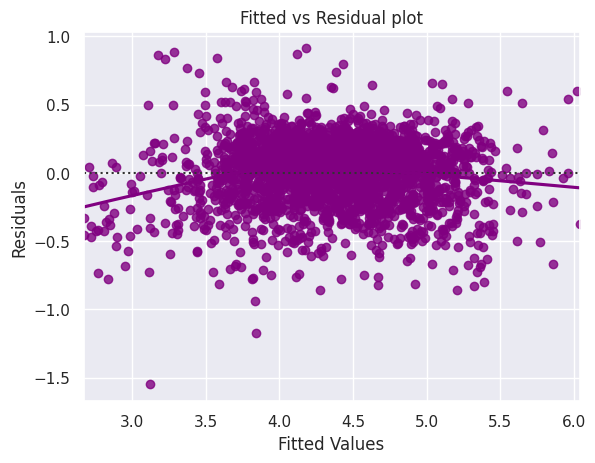

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

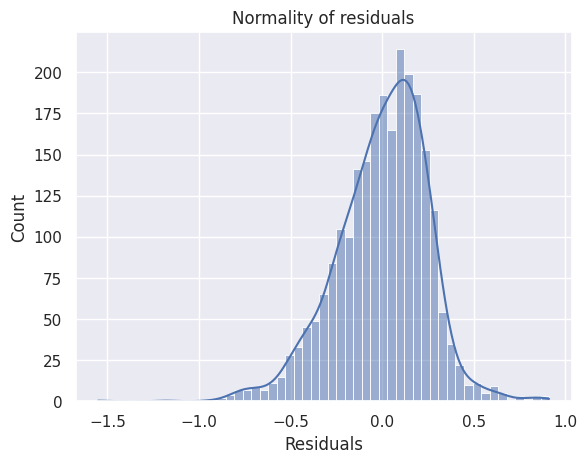

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)## Complete the code to plot the distribution of residuals
plt.title("Normality of residuals")
plt.show()

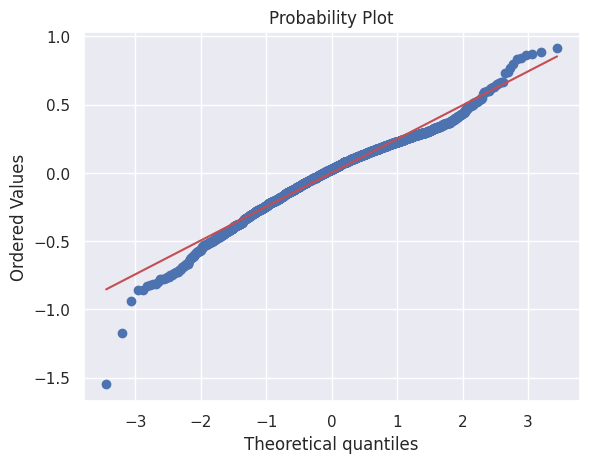

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) ## Complete the code check Q-Q plot
plt.show()

In [ ]:
stats.shapiro(df_pred["Residuals"]) ## Complete the code to apply the Shapiro-Wilks test

ShapiroResult(statistic=0.9784456951562784, pvalue=1.146846775433719e-18)

### TEST FOR HOMOSCEDASTICITY



- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) ## Complete the code with the right train data to apply the Goldfeldquandt test
lzip(name, test)

[('F statistic', 1.0013059518003373), ('p-value', 0.49099826685026904)]

In [ ]:
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.363013
2341,3.696103,4.028503
1913,3.592093,3.765130
688,4.306495,4.054104
650,4.522115,5.198444
2291,4.259294,4.366271
40,4.997685,5.356138
1884,3.875359,4.109617
2538,4.206631,4.080857
45,5.380450,5.257198


## Final Model Summary

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit() ## Complete the code to fit the final model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.816
Model:                               OLS   Adj. R-squared:                  0.815
Method:                    Least Squares   F-statistic:                     889.2
Date:                   Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                           01:15:38   Log-Likelihood:                -81.674
No. Observations:                   2417   AIC:                             189.3
Df Residuals:                       2404   BIC:                             264.6
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# prompt: Explain few observations about final model summary

# Observations about the final model summary:

# 1. R-squared and Adjusted R-squared:  Examine the R-squared and Adjusted R-squared values.
#    These indicate the proportion of variance in the target variable (normalized_used_price)
#    explained by the model. Higher values (closer to 1) suggest a better fit, but be cautious
#    of overfitting.  Compare the R-squared values of the initial and final models to see the
#    impact of feature selection. A slightly lower adjusted R-squared in the final model compared
#    to earlier iterations might be acceptable if it's accompanied by improved other metrics
#    (like lower RMSE, fewer variables, and better adherence to assumptions).

# 2. P-values:  All p-values for coefficients should ideally be below a significance level (e.g. 0.05).
#    This indicates that each predictor variable is statistically significant in predicting the
#    target variable.  The final model should have only statistically significant features.
#    The final model's summary should show no p-values greater than 0.05.

# 3. Coefficients: Look at the magnitude and sign of the coefficients.  They indicate the direction
#    and strength of the relationship between each predictor and the target variable. For example,
#    a positive coefficient implies that an increase in the predictor is associated with an increase
#    in the predicted used price. Understand the business implications of these relationships.

# 4. F-statistic and Prob (F-statistic):  The F-statistic tests the overall significance of the model.
#    A low p-value (Prob(F-statistic)) suggests that the model as a whole is statistically significant.

# 5. Residuals: Implicitly, the final model summary doesn't directly show the residuals, but it is crucial
#    to have checked the model assumptions thoroughly BEFORE arriving at the final model (as done in
#    preceding code). The assumption checks (linearity, homoscedasticity, normality of residuals)
#    were conducted before finalizing the model.

# 6. Model Performance Metrics (Outside Summary): The code calculates various performance metrics
#     (RMSE, MAE, R-squared, Adj. R-squared, MAPE) for both the training and test datasets. Pay
#     close attention to these metrics on the test set, which is the most important evaluation,
#     providing an unbiased estimate of the model's predictive ability on new, unseen data.
#     Compare the training and testing performance; a large gap could indicate overfitting.

# In summary, a good final model summary should exhibit statistically significant predictors, an
# acceptable R-squared/adjusted R-squared, coefficients that make sense in context, and should
# have met the regression assumptions, along with reasonable performance on unseen data.

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train
) ## Complete the code to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.250287,0.194316,0.81613,0.815135,4.677589


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test) ## Complete the code to check performance on test data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.252521,0.195275,0.823203,0.820956,4.778809


##  Actionable Insights and Recommendations

Solution Approach
Data Collection and Preparation:

Gather comprehensive data on historical sales of used and refurbished devices, including:
Device specifications (brand, model, RAM, storage, camera, battery, etc.)
Selling price
Purchase date
Market trends (competitive pricing, demand fluctuations)
Clean and preprocess the data to handle missing values, outliers, and inconsistencies.
Engineer relevant features, such as age of the device, normalized new price, and categorical variables for brands and operating systems.
Model Development:

Linear Regression: Build a linear regression model to predict the optimal selling price based on the identified features.
Feature Selection: Employ techniques like forward/backward selection or regularization (Lasso/Ridge) to identify the most significant factors influencing price.
Model Evaluation: Assess model performance using metrics such as R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
Model Deployment and Monitoring:

Integrate the trained model into ReCell's pricing system to provide real-time price recommendations.
Continuously monitor model performance and retrain it periodically with new data to ensure accuracy and adapt to evolving market conditions.
Dynamic Pricing Strategy:

Implement dynamic pricing adjustments based on real-time market signals, such as competitor pricing, inventory levels, and demand forecasts.
Utilize A/B testing to evaluate the impact of different pricing strategies on sales and revenue.
By implementing this ML-driven approach, ReCell can optimize pricing decisions, improve profitability, and gain a competitive advantage in the growing used device market-


ANother Approach

To address this challenge, an ML-based solution was implemented using linear regression to predict the normalized used price of phones and tablets. The following steps were undertaken:

Data Analysis and Preprocessing:

Exploratory data analysis was conducted to identify factors influencing device prices, such as specifications (camera resolution, RAM, battery life), device age, and brand.
Data preprocessing included normalizing variables like new prices and encoding categorical features such as brand names and operating systems.
Model Development:

An Ordinary Least Squares (OLS) regression model was built to predict normalized used prices.
Feature selection was performed to refine the model, focusing on variables with significant impact (e.g., camera resolution, RAM, battery capacity, and years since release).
Key Findings:

The model achieved an R-squared value of 0.816, indicating strong explanatory power for predicting used prices.
Factors such as normalized new price, camera resolution, battery capacity, and years since release showed significant influence on pricing.
Brand and operating system also contributed, with some brands and features affecting prices positively or negatively.
Business Application:

The model enables ReCell to implement dynamic pricing strategies that reflect market trends and consumer demand.
It provides actionable insights to refine product offerings and marketing strategies.
By combining statistical rigor with business insights, the proposed solution equips ReCell to navigate the competitive landscape of the used device market effectively.

---------